# Data Science & Analytics (CSIS 503) 
## Credit Risk Analysis of Loan Portfolio
### Group Members info
#### Adrian L. Diadula---------------+639472885413------------------adiadula@osiriuniversity.org
#### Ametelah Abubeker Aliy ---------+251900296819------------------amaliy@osiriuniversity.org
#### Eboigbe Harrison----------------+2348167069292-----------------eharri@osiriuniversity.org
#### Metasebia Fekadu Wondimu--------+251911985184------------------mwondimu@osiriuniversity.org
#### Randy Boateng------------------ +233552857293------------------randyboateng@osiriuniversity.org


# Understand the Data
## Data Features with description
##### Loan ID----------- Unique identifier for each loan
##### Loan Type----------- Category or purpose of loan (e.g., Personal, auto, hotel, etc.)
##### Loan amount-----------The total principal borrowed
##### Loan Term----------- Duration of the loan (e.g., months, years, …)
##### Interest rate----------- Annual interest rate (in%)
##### Disbursement date-----------Date the loan was issued
##### Disbursement date-----------Date the loan was issued
##### Repayment schedule-----------Frequency of payment (e.g., monthly, quarterly)
##### Loan installment------------- Fixed periodic payment amount


# Loading and inspecting the loan data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel ("DSGroup10 Loan.xlsx")
df.head()
df.info()
df.describe()
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7577 entries, 0 to 7576
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LOAN ID              7577 non-null   int64         
 1   ECONOMIC SECTOR      7577 non-null   object        
 2   Loan Type            7577 non-null   object        
 3   RISK LIM             7576 non-null   float64       
 4   Principal            7577 non-null   float64       
 5   Interest             7577 non-null   float64       
 6   Total Balance        7577 non-null   float64       
 7   DATE OPEN            7577 non-null   datetime64[ns]
 8   Maturity Date        7577 non-null   datetime64[ns]
 9   Repayment Frequency  7577 non-null   float64       
 10  Period               7577 non-null   object        
 11  INSAMT               7577 non-null   float64       
 12  INT RATE             7577 non-null   float64       
 13  Risk Class           7568 non-nul

# Handling Missing Values
##### - Risk Limit has only 1 missing which is minor issue. It can be imputed with median or mean or mode.
##### - Risk Class, very few missing values. It could be imputed with most frequent, predictive method.
##### - Even if the missing values are insignificant based on the dataset size we choose to imputem since imputing missing values consistently is key for model accuracy.

In [2]:
df['RISK LIM']=df['RISK LIM'].fillna(df['RISK LIM'].median())
most_frequent_class=df['Risk Class'].mode()[0]
df['Risk Class']=df['Risk Class'].fillna(most_frequent_class)

In [14]:
print("\nMissing values per column:")
print(df.isnull().sum())
df = df.dropna()


Missing values per column:
LOAN ID                0
ECONOMIC SECTOR        0
Loan Type              0
RISK LIM               0
Principal              0
Interest               0
Total Balance          0
DATE OPEN              0
Maturity Date          0
Repayment Frequency    0
Period                 0
INSAMT                 0
INT RATE               0
Risk Class             0
dtype: int64


## converting specific columns into string (text) data type, Date columns into proper datetime format and Numerical columns in integer format

In [9]:
#Convert into strings
df['ECONOMIC SECTOR'] = df['ECONOMIC SECTOR'].astype(str)
df['Loan Type'] = df['Loan Type'].astype(str)
df['Period'] = df['Period'].astype(str)
df['Risk Class'] = df['Risk Class'].astype(str)
# Convert date columns
df['DATE OPEN'] = pd.to_datetime(df['DATE OPEN'])
df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])
df['Repayment Frequency'] =df['Repayment Frequency'].astype(int)


## Performs data audit:Negative values in important financial columns ,Missing values in critical fields, and Potential edge cases (e.g., 0% interest)

In [10]:
negative_Principal_rows_Count = df[df['Principal'] < 0].shape [0]
print(negative_Principal_rows_Count)
negative_Interest_rows_Count = df[df['Interest'] < 0].shape [0]
print(negative_Interest_rows_Count)
negative_Balance_rows_Count = df[df['Total Balance'] < 0].shape [0]
print(negative_Balance_rows_Count)
Zero_interest_rate_Count = df[df['INT RATE'] == 0].shape [0]
print(Zero_interest_rate_Count)
missing_INT_RATE_Count=df['INT RATE'].isna().sum()
print (missing_INT_RATE_Count)
missing_DATE_OPEN_Count=df['DATE OPEN'].isna().sum()
print(missing_DATE_OPEN_Count)
missing_Maturity_Date_Count=df['Maturity Date'].isna().sum()
print(missing_Maturity_Date_Count)

0
0
0
2
0
0
0


## Removes rows with Zero interest rate

In [11]:
#remove rows with INT RATE equals Zero
df=df[df['INT RATE']!=0]

From the above analysis there is no negative value in Principal Blance, interest Blance, and Total Blance. But there are two rows with interest rate Zero which results in wrong analysis. So we need to drop this two rows with the following command.

## Check if there is Duplicates in the dataset

In [12]:
#The unique identifier of each record is LoanID
duplicate_LoanID= df[df.duplicated('LOAN ID', keep=False)]
duplicat_Count= df['LOAN ID'].duplicated().sum()
print(f"Number of duplicate LoanIDS: {duplicat_Count}")

Number of duplicate LoanIDS: 335


The dataset has 336 duplicates thus allduplicate except the first occurence are droped

## Removes all duplicates except the first occurence of each duplicate LOANID

In [18]:
# removes all but the first occurence pf each duplicate LOANID
df = df.drop_duplicates(subset='LOAN ID', keep='first')
df = df.drop_duplicates()
duplicate_LoanID= df[df.duplicated('LOAN ID', keep=False)]
duplicat_Count= df['LOAN ID'].duplicated().sum()
print(f"Number of duplicate LoanIDS: {duplicat_Count}")

Number of duplicate LoanIDS: 0


## Handling Outliers

In [19]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[float, int])))
df = df[(z_scores < 3).all(axis=1)]

## Save the Cleaned Dataset

In [22]:
df.to_excel("DSGroup10Loan_cleaned.xlsx", index=False)

In [ ]:
## Import the Cleaned Data set

In [25]:
df=pd.read_excel ("DSGroup10Loan_cleaned.xlsx")
df.head()

,LOAN ID,ECONOMIC SECTOR,Loan Type,RISK LIM,Principal,Interest,Total Balance,DATE OPEN,Maturity Date,Repayment Frequency,Period,INSAMT,INT RATE,Risk Class
0,100310089231051,MORTGAGE-STAFF LOAN,TERM LOAN,476516.0,405620.75,1588.59,407209.34,2015-06-17,2040-06-17,300,MONTHLY,3926.37,9.0,PASS
1,100310089231101,PERSONAL STAFF,TERM LOAN,361000.0,318010.79,2587.53,320598.32,2017-01-30,2041-09-28,296,MONTHLY,2983.09,9.0,PASS
2,100310437731051,MORTGAGE-STAFF LOAN,TERM LOAN,1250176.0,578558.15,776.72,579334.87,2022-01-11,2033-07-25,138,MONTHLY,7007.17,7.0,PASS
3,100310437731101,PERSONAL STAFF,TERM LOAN,1250176.0,256612.69,344.47,256957.16,2022-01-11,2033-07-25,138,MONTHLY,3106.68,7.0,PASS
4,100310437731116,AUTO MOBILE STAFF,TERM LOAN,2185000.0,2068742.01,12696.00,2081438.01,2023-05-31,2033-05-31,120,MONTHLY,25226.64,7.0,PASS


## Visualize Loans Opened Over Time

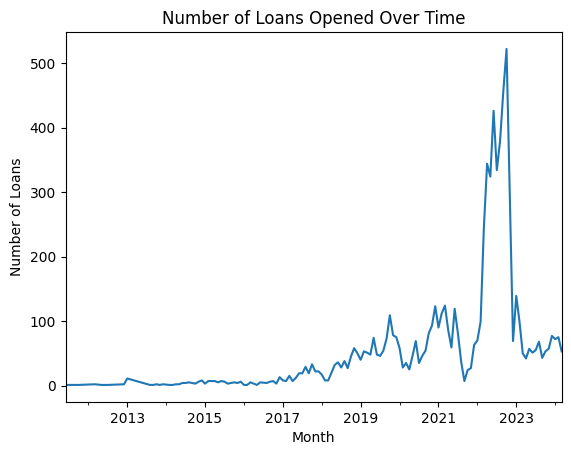

In [57]:
# Time Series: Number of Loans Opened Over Time
df['DATE OPEN'] = pd.to_datetime(df['DATE OPEN'])
df['open_month'] = df['DATE OPEN'].dt.to_period('M')
df.groupby('open_month').size().plot(kind='line', title='Number of Loans Opened Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.show()

## Visualize Loan Count by Economic Sector

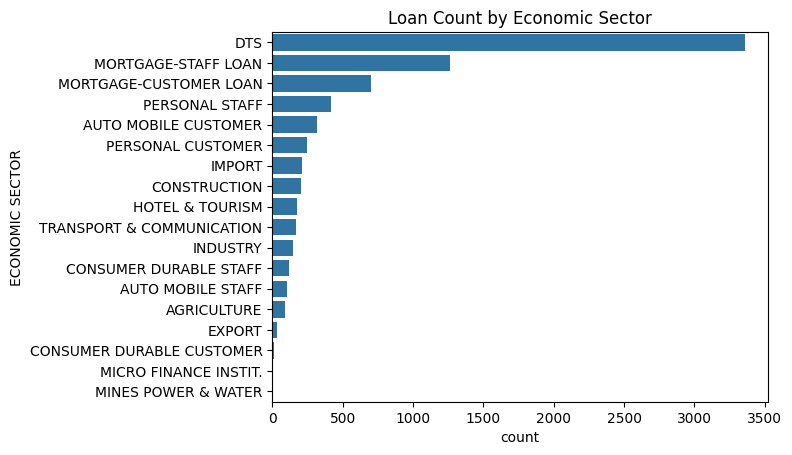

In [58]:
# Count plot for ECONOMIC SECTOR
sns.countplot(y='ECONOMIC SECTOR', data=df, order=df['ECONOMIC SECTOR'].value_counts().index)
plt.title('Loan Count by Economic Sector')
plt.show()

##  Visualize Total Balance by Risk Class

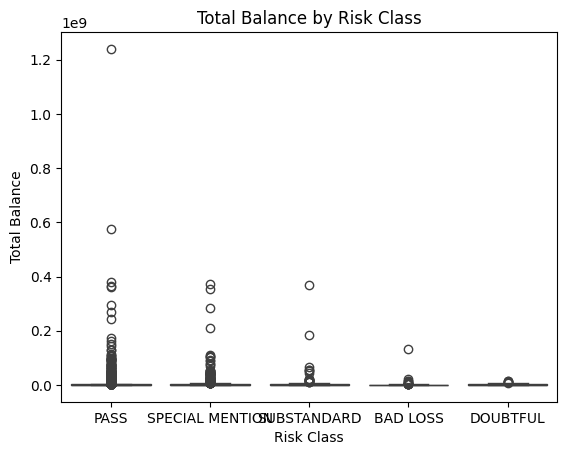

In [59]:
# Boxplots by Risk Class
#for df in numerical_cols:
sns.boxplot(x='Risk Class', y='Total Balance', data=df[['Risk Class', 'Total Balance']])
plt.title('Total Balance by Risk Class')
plt.show()


## Visualize how much exposure (Principal) each sector has, and how that exposure is distributed across risk classes

Risk Exposure by sector


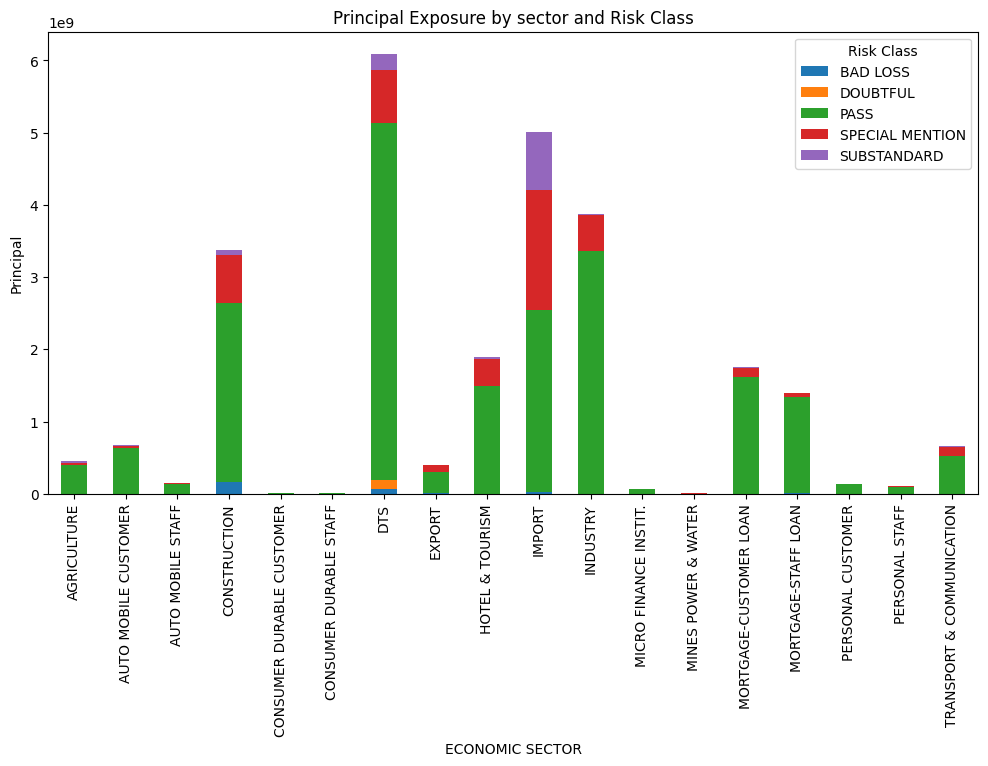

In [43]:
#visualize how much exposure (Principal) each sector has, and how that exposure is distributed across risk classes.
print ("Risk Exposure by sector")
risk_Sector= df.groupby(['ECONOMIC SECTOR', 'Risk Class']) ['Principal'].sum().unstack().fillna(0)
risk_Sector.plot (kind='bar', stacked= True, figsize=(12,6), title= "Principal Exposure by sector and Risk Class")
plt.ylabel("Principal")
plt.show()

## learns patterns in loan-related data (like sector, type, age, etc.) to predict the loan’s risk classification

In [27]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
#Creating two new numerical features:
df["loan_age"] = (pd.to_datetime("today") - pd.to_datetime(df["DATE OPEN"])).dt.days
df["maturity_length"] = (pd.to_datetime(df["Maturity Date"]) - pd.to_datetime(df["DATE OPEN"])).dt.days
X = df.drop(columns=["LOAN ID", "Risk Class", "DATE OPEN", "Maturity Date", "Period"])
le = LabelEncoder()
y_encoded = le.fit_transform(df["Risk Class"])
y=y_encoded
# Categorical & numeric features
categorical_features = ["ECONOMIC SECTOR", "Loan Type"]
numeric_features = [col for col in X.columns if col not in categorical_features]
# Transformers
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("num", StandardScaler(), numeric_features)
])
# Model pipeline
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", XGBClassifier(eval_metric='mlogloss'))
])
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit model
model.fit(X_train, y_train)
# Predict
#y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)
 #Decode true labels as well for comparison
y_test_labels = le.inverse_transform(y_test)
# Create a DataFrame to compare
results_df = pd.DataFrame({
    "Actual": y_test_labels,
    "Predicted": y_pred_labels
})

# Display the first few rows
print(results_df.head(10))


            Actual Predicted
0             PASS      PASS
1             PASS      PASS
2             PASS      PASS
3             PASS      PASS
4             PASS      PASS
5  SPECIAL MENTION      PASS
6             PASS      PASS
7             PASS      PASS
8             PASS      PASS
9             PASS      PASS


## Classification Report

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test_labels, y_pred_labels)
print(report)
#print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

                 precision    recall  f1-score   support

       BAD LOSS       0.84      0.78      0.81        27
       DOUBTFUL       0.38      0.45      0.42        11
           PASS       0.91      0.98      0.94      1212
SPECIAL MENTION       0.56      0.19      0.28       135
    SUBSTANDARD       0.71      0.41      0.52        29

       accuracy                           0.89      1414
      macro avg       0.68      0.56      0.59      1414
   weighted avg       0.86      0.89      0.86      1414



## The Overall result shows

-Accuracy: 0.89 — the model predicts correctly 89% of the time overall, which is quite solid. 

-Macro average F1-score: 0.59 — shows a moderate balance between precision and recall across all classes equally.

-Weighted average F1-score: 0.86 — reflects overall performance weighted by class support, so it’s heavily influenced by the “PASS” class since it has the largest support. 

-The model is great at predicting PASS but struggles with minority classes like DOUBTFUL and SPECIAL MENTION which shows that the lending process of the company is very healthy

## Confusion Matrix

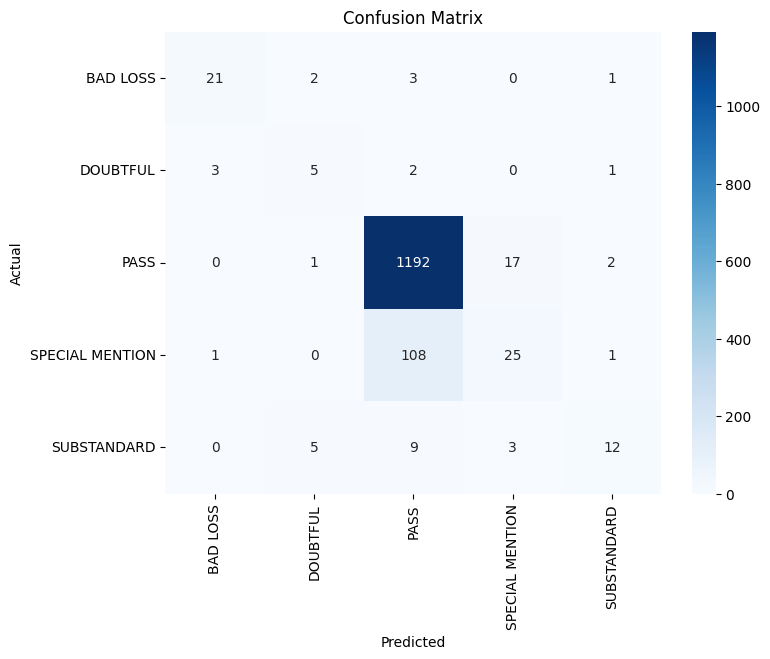

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The key observations from the analysis highlight several important takeaways regarding the model's performance. The dataset suffers from imbalanced classes, with the "PASS" class significantly dominating (1304 instances), which may introduce bias into the model's predictions. Minority classes such as "DOUBTFUL," and "SPECIAL MENTION," indicating that the model struggles with these categories. Additionally, the model demonstrates high recall but low precision for the "BAD LOSS" class, meaning it tends to over-predict this category, often incorrectly. Overall, these issues suggest the model is not well-trained to handle minority classes, and improvements could be made by incorporating more data, applying sampling techniques, or rebalancing the dataset.

## Cross Validation

In [92]:
#Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9733333333333334


The Logistic Regression model, evaluated through 5-fold cross-validation, shows excellent predictive performance with a mean accuracy of about 97.3%. The consistent high scores across all folds indicate the model is robust and not likely overfitting given the cross-validation setup.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make sure X_train and X_test contain only numeric columns
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_res)

# Predict on test set
rf_pred = rf_model.predict(X_test_scaled)

# Define evaluation function with proper average parameter for multiclass
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Evaluation results for {model_name}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Evaluate the model
evaluate_model(y_test, rf_pred, "Random Forest")

#evaluate_model(y_test, rf_pred, "Random Forest")

After SMOTE: {2: 4860, 3: 4860, 4: 4860, 1: 4860, 0: 4860}
Evaluation results for Random Forest:
Accuracy:  0.8522
Precision: 0.8472
Recall:    0.8522
F1 Score:  0.8486


## The SMOTE distribution

All classes (0 through 4) now have 4860 samples each

It is achieved a perfectly balanced dataset across 5 classes.
    
## From The Random Forest analysis 
Accuracy (85.22%): The model correctly predicted about 85% of the samples overall, which is generally a strong performance.

Precision (84.72%): Out of all the instances predicted as positive (or a certain class), about 84.7% were actually correct. This indicates a low rate of false positives.

Recall (85.22%): Out of all the true instances of a class, the model identified about 85.2%. This suggests a low rate of false negatives.

F1 Score (84.86%): The harmonic mean of precision and recall, indicating a good balance between them.

## Conclusion
- The model classifies the dominant class PASS with high accuracy, precision, and recall.
- Despite SMOTE balancing, precision and recall for smaller classes (e.g., DOUBTFUL, SPECIAL MENTION) remain low, indicating difficulty in identifying these cases correctly.
- The high cross-validated accuracy may have been optimistic, possibly due to overfitting or data leakage; real-world performance is lower but still reasonably good.
- Even with balanced data, the model needs more work (e.g., feature engineering, different algorithms, ensemble methods) to improve minority class detection.